# 작업형 1

문제 : mtcars 데이터셋(data/mtcars.csv)의 qsec 컬럼을 최소최대 척도(Min-Max Scale)로 변환한 후 0.5보다 큰 값을 가지는 레코드 수를 구하시오.

### 필요 모듈 불러오기

In [83]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler

help 함수를 이용하여 함수 사용 예를 확인할 수 있지만 많이 사용하는 것들은 암기하는게 좋을듯하다.

### 데이터 불러오기 read_csv 사용

In [84]:
data = pd.read_csv("data/mtcars.csv")
# Unnamed: 0 없애고 싶으면 index_col = 0 옵션 추가

In [85]:
data.head()

,Unnamed: 0,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
0,Mazda RX4,21.0,6,160.0,110,3.90,2.620,16.46,0,1,4,4
1,Mazda RX4 Wag,21.0,6,160.0,110,3.90,2.875,17.02,0,1,4,4
2,Datsun 710,22.8,4,108.0,93,3.85,2.320,18.61,1,1,4,1
3,Hornet 4 Drive,21.4,6,258.0,110,3.08,3.215,19.44,1,0,3,1
4,Hornet Sportabout,18.7,8,360.0,175,3.15,3.440,17.02,0,0,3,2


In [86]:
data.shape #데이터 shape 확인

(32, 12)

In [87]:
target = data['qsec'] #변환하고자 하는 컬럼 

target_value = target.values #series변수.values 값만 따로 array로 확인하기
new_target = MinMaxScaler().fit_transform(target_value.reshape(-1,1))

In [88]:
new_target = pd.Series(new_target[:,0],name='minmax')
print(sum(new_target > 0.5))

9


#### 자주 사용하는 척도
#### StandardScaler(평균 0, 표준편차 1), RobustScaler(중앙값, IQR 사용하는 척도) 

In [89]:
from sklearn.preprocessing import StandardScaler, RobustScaler

In [90]:
std_target = StandardScaler().fit_transform(target_value.reshape(-1,1))
rbs_target = RobustScaler().fit_transform(target_value.reshape(-1,1))

In [91]:
std_target = pd.Series(std_target[:,0], name = 'standard')
rbs_target = pd.Series(rbs_target[:,0], name = 'robust')

In [92]:
import matplotlib.pyplot as plt
import seaborn as sns

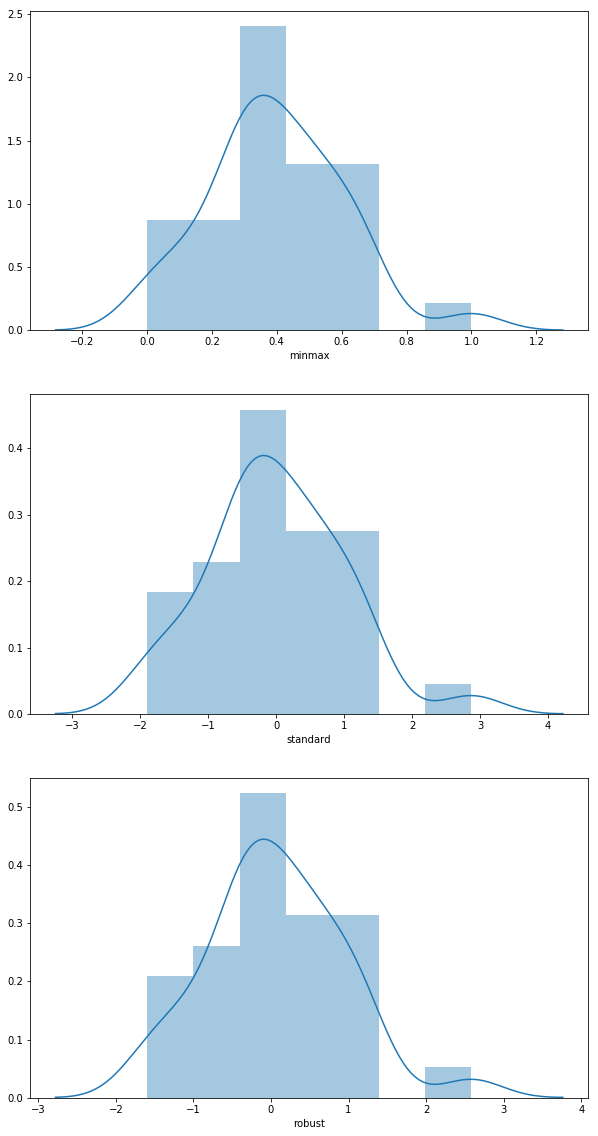

In [93]:
plt.figure(figsize=(10,20))

plt.subplot(311)
sns.distplot(new_target)

plt.subplot(312)
sns.distplot(std_target)

plt.subplot(313)
sns.distplot(rbs_target)